# Logistic Regression Model

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# define Hyperparameters
learning_rate = 0.01
training_epoches = 25
batch_size = 100
display_step = 1
steps = 100

In [31]:
# tf input graph
x = tf.placeholder(tf.float32, shape=[None, 784], name = 'x') # miniet data shape is 784
y = tf.placeholder(tf.float32, shape=[None, 10], name = 'y') # 0-9 digits recognition => 10 classes

# set weight and bais valus
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# start to contruct y = WT * x + b
pred = tf.sigmoid(tf.matmul(x, W) + b)
# compute cost
cost = tf.reduce_mean(-tf.reduce_sum((y*tf.log(pred) + (1-y)*tf.log(1-pred)), reduction_indices=1))
# minimize the cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# initialize the variables
init = tf.global_variables_initializer()

# There is another implement about logistic regression

in this example, we will use TensorBoard to show how this implement is working


In [32]:
# generate input data 

def generate_data(w, b, num_sample = 100, noise_sigma = 0.05):
    noise = np.random.randn(num_sample) * noise_sigma
    x = np.linspace(0, 1, num_sample)
    np.random.shuffle(x)
    y = w * (x + noise) + b
    
    return x, y

train_x , train_y = generate_data(w = -1, b = 0)
test_x = np.linspace(0,1,100)
np.random.shuffle(test_x)
plt.scatter(train_x, train_y)
plt.title('Train_data')
#plt.show()

Text(0.5,1,u'Train_data')

In [33]:
llapi_logdir = '/notebooks/tflab/logs/llapi'
# initialize graph
graph = tf.Graph()

with graph.as_default():
    # define the input layer(scope)
    with tf.name_scope('input'):
        input_data = tf.placeholder(tf.float32, shape=(None, 1), name='input_data')
        
    # define the logistic function
    with tf.name_scope('model'):
        W = tf.Variable(tf.truncated_normal([1,1],stddev=0.1), name='W')
        b = tf.Variable(tf.constant(0.1, shape=[1]), name='b')
        output_data = tf.add(input_data * W, b, name='output_data')
        
    # define loss , use Gradient Descent as optimizer
    with tf.name_scope('train'):
        target_op = tf.placeholder(tf.float32, shape=(None, 1), name='target_op')
        loss = tf.reduce_mean(tf.reduce_sum((output_data * tf.log(target_op)),reduction_indices=1))
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, name = 'optimizer')
        
    # logs for TensorBoard
    tf.summary.scalar('loss', loss)
    summary_op = tf.summary.merge_all()
        
        

In [34]:
# init train
session = tf.InteractiveSession(graph=graph)
session.run(tf.global_variables_initializer())

# start train
event_writer = tf.summary.FileWriter(llapi_logdir, sess.graph)

for step in range(steps):
    summary, _ = session.run([summary_op, optimizer],
                            feed_dict = {
                                input_data: train_x.reshape(-1,1),
                                target_op: train_y.reshape(-1,1)
                            })
    # add logs
    event_writer.add_summary(summary, step)
event_writer.close()

                         

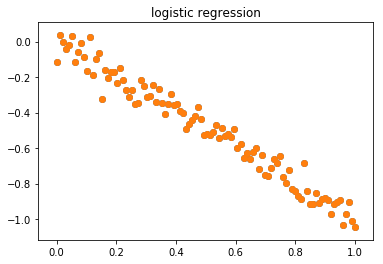

In [35]:
# inferance
y_test_llapi = session.run(output_data,
                          feed_dict = {input_data: test_x.reshape(-1, 1)})

plt.scatter(train_x, train_y)
plt.scatter(test_x, y_test_llapi)
plt.title('logistic regression')
plt.show()
